In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("walmart_sales.csv")

In [4]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,1/1/2012,28774,High,32,...,-111.80,East,4031,180.36,1/2/2012,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,1/1/2012,13729,Not Specified,9,...,-342.91,East,1914,872.48,1/3/2012,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,1/2/2012,37537,Low,4,...,-193.08,West,5272,1239.06,1/2/2012,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,1/2/2012,44069,Critical,43,...,247.79,West,6225,614.80,1/2/2012,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,1/2/2012,37537,Low,43,...,-1049.85,West,5273,4083.19,1/4/2012,Delivery Truck,45.00,California,100.98,94559


In [5]:
df = df[["City", "Order Quantity", "Product Category", "Product Sub-Category","Sales","State"]]
df.head()

,City,Order Quantity,Product Category,Product Sub-Category,Sales,State
0,McKeesport,32,Office Supplies,Storage & Organization,180.36,Pennsylvania
1,Bowie,9,Office Supplies,Storage & Organization,872.48,Maryland
2,Napa,4,Furniture,Chairs & Chairmats,1239.06,California
3,Montebello,43,Office Supplies,Paper,614.80,California
4,Napa,43,Furniture,Chairs & Chairmats,4083.19,California


In [6]:
df.head()

,City,Order Quantity,Product Category,Product Sub-Category,Sales,State
0,McKeesport,32,Office Supplies,Storage & Organization,180.36,Pennsylvania
1,Bowie,9,Office Supplies,Storage & Organization,872.48,Maryland
2,Napa,4,Furniture,Chairs & Chairmats,1239.06,California
3,Montebello,43,Office Supplies,Paper,614.80,California
4,Napa,43,Furniture,Chairs & Chairmats,4083.19,California


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  8399 non-null   object 
 1   Order Quantity        8399 non-null   int64  
 2   Product Category      8399 non-null   object 
 3   Product Sub-Category  8399 non-null   object 
 4   Sales                 8399 non-null   float64
 5   State                 8399 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 393.8+ KB


In [8]:
df = df.dropna()
df.isnull().sum()

City                    0
Order Quantity          0
Product Category        0
Product Sub-Category    0
Sales                   0
State                   0
dtype: int64

In [9]:
df['State'].value_counts()

State
California        780
Texas             577
Illinois          500
Florida           479
Ohio              396
New York          372
Michigan          291
Indiana           241
Washington        240
Minnesota         239
Pennsylvania      219
North Carolina    211
Virginia          198
Georgia           181
Maryland          178
Colorado          177
New Jersey        177
Wisconsin         169
Oregon            168
Tennessee         166
MO                161
Iowa              156
MA                150
Utah              146
Arizona           134
Kansas            133
Maine             128
Alabama           125
Arkansas          123
Idaho             114
South Carolina    105
Oklahoma          104
Louisiana          89
New Mexico         84
Kentucky           83
Connecticut        82
Mississippi        78
Nebraska           77
Vermont            61
New Hampshire      54
Montana            49
Nevada             43
West Virginia      43
North Dakota       34
South Dakota       28
Wyom

In [10]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
country_map = shorten_categories(df.State.value_counts(), 100)
df['State'] = df['State'].map(country_map)
df.State.value_counts()

State
Other             861
California        780
Texas             577
Illinois          500
Florida           479
Ohio              396
New York          372
Michigan          291
Indiana           241
Washington        240
Minnesota         239
Pennsylvania      219
North Carolina    211
Virginia          198
Georgia           181
Maryland          178
New Jersey        177
Colorado          177
Wisconsin         169
Oregon            168
Tennessee         166
MO                161
Iowa              156
MA                150
Utah              146
Arizona           134
Kansas            133
Maine             128
Alabama           125
Arkansas          123
Idaho             114
South Carolina    105
Oklahoma          104
Name: count, dtype: int64

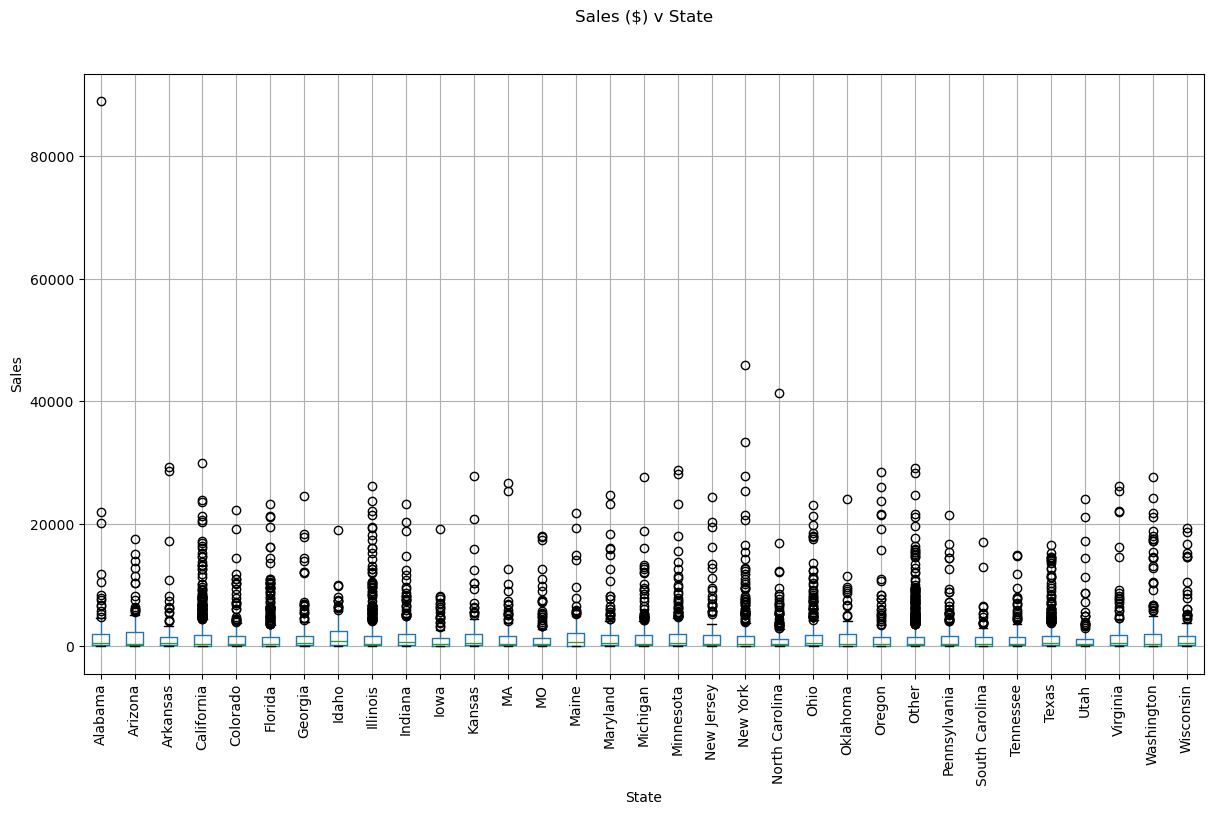

In [12]:
fig, ax = plt.subplots(1,1, figsize=(14, 8))
df.boxplot('Sales', 'State', ax=ax)
plt.suptitle('Sales ($) v State')
plt.title('')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df['State'] != 'Other']

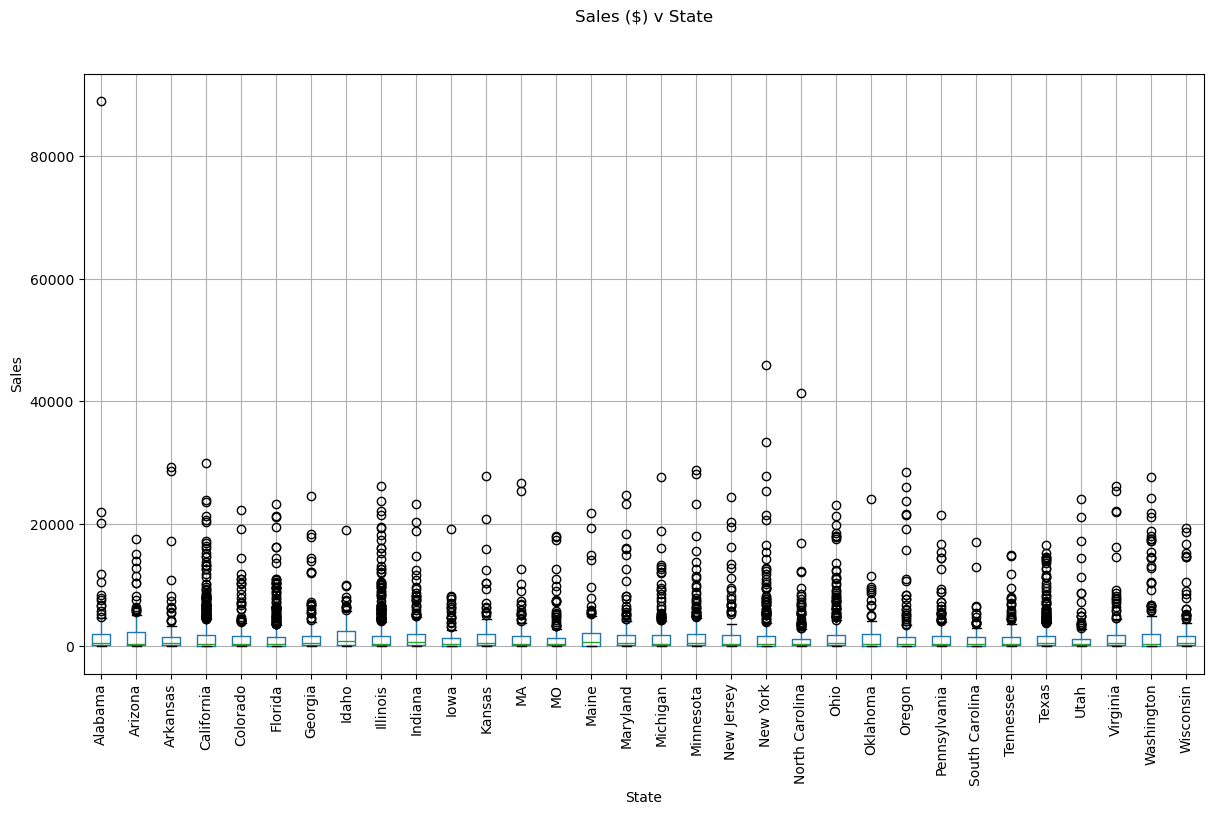

In [14]:
fig, ax = plt.subplots(1,1, figsize=(14, 8))
df.boxplot('Sales', 'State', ax=ax)
plt.suptitle('Sales ($) v State')
plt.title('')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [15]:
df["Product Category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [16]:
df["Product Sub-Category"].unique()

array(['Storage & Organization', 'Chairs & Chairmats', 'Paper',
       'Binders and Binder Accessories', 'Tables', 'Office Furnishings',
       'Pens & Art Supplies', 'Office Machines',
       'Telephones and Communication', 'Computer Peripherals',
       'Bookcases', 'Copiers and Fax', 'Labels', 'Appliances',
       'Rubber Bands', 'Envelopes', 'Scissors, Rulers and Trimmers'],
      dtype=object)

In [17]:
def clean_sub_category(x):
    if 'Storage & Organization' in x:
        return 'Storage & Organization'
    if 'Chairs & Chairmats' in x or 'Tables' in x or 'Office Furnishings' in x:
        return 'Office Furnishings'
    if 'Paper'in x or 'Binders and Binder Accessories' in x or 'Pens & Art Supplies' in x or 'Bookcases' in x or 'Copiers and Fax' in x or 'Labels' in x or 'Envelopes' in x or 'Scissors, Rulers and Trimmers' in x:
        return 'stationary'
    if 'Office Machines' in x or'Telephones and Communication' in x:
        return 'Office Machines'
    if 'Computer Peripherals' in x:
        return 'Computer Peripherals'
    if 'Appliances' in x:
        return 'Appliances'
    if 'Rubber Bands' in x:
        return 'accessories'
df.loc[:, 'Product Sub-Category'] = df['Product Sub-Category'].apply(clean_sub_category)


In [18]:
df['Product Sub-Category'].unique()

array(['Storage & Organization', 'Office Furnishings', 'stationary',
       'Office Machines', 'Computer Peripherals', 'Appliances',
       'accessories'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])
df["City"].unique()

array([673, 110, 744, ..., 249, 658, 748])

In [20]:
le_category = LabelEncoder()
df['Product Category'] = le_category.fit_transform(df['Product Category'])
df["Product Category"].unique()

array([1, 0, 2])

In [21]:
le_sub_category = LabelEncoder()
df['Product Sub-Category'] = le_sub_category.fit_transform(df['Product Sub-Category'])
df["Product Sub-Category"].unique()

array([4, 2, 6, 3, 1, 0, 5])

In [22]:
le_state = LabelEncoder()
df['State'] = le_city.fit_transform(df['State'])
df["State"].unique()

array([24, 15,  3, 17,  0, 28, 23, 27, 10, 22,  5, 19,  8, 29, 25, 14, 21,
       30, 18, 31, 16, 13, 12, 26,  4,  7,  2,  9, 11,  1,  6, 20])

In [23]:
#Modeling
#Split
X = df.drop("Sales", axis=1)
y = df["Sales"]

In [24]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(X)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [27]:
error

3495.9316248733317

In [28]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred = dec_tree_reg.predict(X)

In [30]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$277.11


In [31]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [32]:
y_pred = random_forest_reg.predict(X)

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$1,218.33


In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [35]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$3,006.03


In [36]:
X

,City,Order Quantity,Product Category,Product Sub-Category,State
0,673,32,1,4,24
1,110,9,1,4,15
2,744,4,0,2,3
3,717,43,1,6,3
4,744,43,0,2,3
...,...,...,...,...,...
8392,351,6,0,2,3
8393,177,45,0,2,29
8394,351,35,1,4,3
8395,457,37,1,6,27


In [37]:
# City		Order Quantity	Product Category	Product Sub-Category	State
X = np.array ([["McKeesport",32,"Office Supplies","Storage & Organization","Pennsylvania"]])
X

array([['McKeesport', '32', 'Office Supplies', 'Storage & Organization',
        'Pennsylvania']], dtype='<U22')

In [38]:
le_city = LabelEncoder()
le_customer = LabelEncoder()
le_category = LabelEncoder()
le_sub_category = LabelEncoder()
le_state = LabelEncoder()

In [39]:
le_city.fit(X[:, 0])
le_customer.fit(X[:, 1])
le_category.fit(X[:, 3])
le_sub_category.fit(X[:, 4])
le_state.fit(X[:, 5])

IndexError: index 5 is out of bounds for axis 1 with size 5

In [ ]:
# Function to handle unseen labels
def transform_with_unseen_labels(encoder, values):
    unseen_value = len(encoder.classes_)
    classes = list(encoder.classes_) + ['<unseen>']
    encoder.classes_ = np.array(classes)
    return np.array([encoder.transform([item if item in encoder.classes_ else '<unseen>'])[0] for item in values])

In [ ]:
# New data for transformation
X_new = np.array([['McKeesport', 'Jessica Myrick', '32', 'Office Supplies', 'Storage & Organization', 'Pennsylvania']])

In [ ]:
# Transform the new data
X_new[:, 0] = transform_with_unseen_labels(le_city, X_new[:, 0])
X_new[:, 1] = transform_with_unseen_labels(le_customer, X_new[:, 1])
X_new[:, 3] = transform_with_unseen_labels(le_category, X_new[:, 3])
X_new[:, 4] = transform_with_unseen_labels(le_sub_category, X_new[:, 4])
X_new[:, 5] = transform_with_unseen_labels(le_state, X_new[:, 5])

In [ ]:
X_new = X_new.astype(float)
print("Transformed X_new:", X_new)

In [ ]:
X_new

In [ ]:
y_pred = regressor.predict(X_new)
y_pred

In [ ]:
import pickle


In [ ]:
data = {"model": regressor, "le_state": le_state, "le_category": le_category}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_state"]
le_education = data["le_category"]

In [ ]:
y_pred = regressor_loaded.predict(X_new)
y_pred

In [ ]:
# X[:, 0] = le_city.transform(X[:,0])
# X[:, 1] = le_customer.transform(X[:,1])
# X[:, 3] = le_category.transform(X[:,3])
# # X = X.astype(float)
# X